# Exercise 1 : data visualization

Dataset stats: 
           variance     skewness     kurtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class:
0    762
1    610
Name: class, dtype: int64


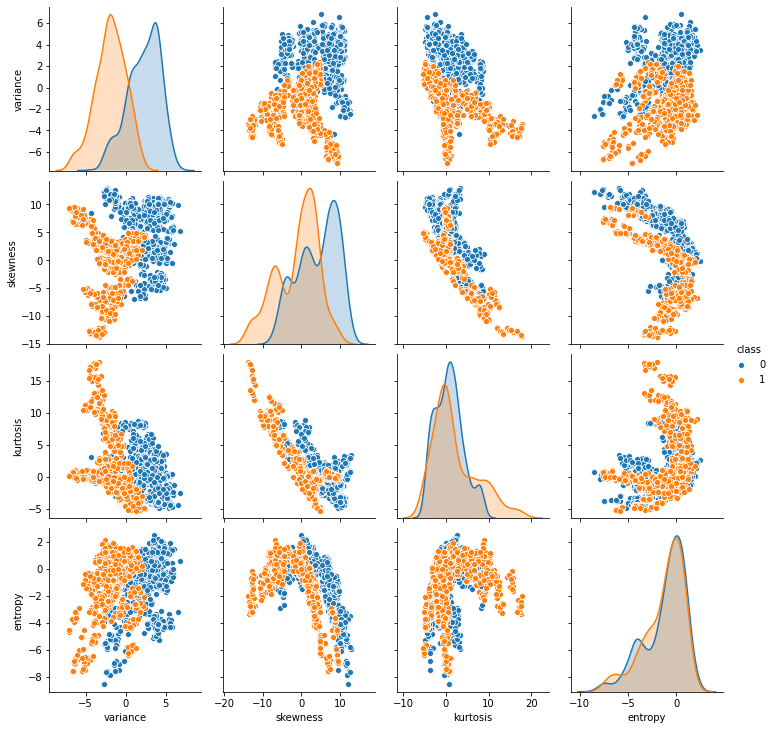

In [1]:
# Question 1
# import seaborn module
import seaborn as sns
import pandas as pd 
import numpy as np

# load csv dataset file using pandas 
banknotes = pd.read_csv('data/banknotes/banknotes.csv')

# Question 2
# using pairplot to view pairwise relationships in the dataset
sns.pairplot(banknotes, hue='class') 

# Question 3
# generate descriptive statistics of the dataset
print('Dataset stats: \n', banknotes.describe())

# Question 4
# Count the number of observations of each class
print('Observations per class:\n{}'.format(banknotes['class'].value_counts()))

# Exercise 2 : binary classification

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Question 1
# instantiate the model, add hidden and output layers
model2=Sequential()
model2.add(Dense(4, input_shape=(4,), activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

# Question 2
# compile and summarize the model
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.summary()

# Question 3
# load train and test data
X_train_banknotes=np.load("data/banknotes/X_train_banknotes.npy")
y_train_banknotes=np.load("data/banknotes/y_train_banknotes.npy")
X_test_banknotes=np.load("data/banknotes/X_test_banknotes.npy")
y_test_banknotes=np.load("data/banknotes/y_test_banknotes.npy")

# train the model 
model2.fit(X_train_banknotes, y_train_banknotes, epochs=30)

# Question 4
# evaluate the model accuracy on test data
print('model accuracy on test data: ', np.round(model2.evaluate(X_test_banknotes, y_test_banknotes, verbose=0)[1],4))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
30/30 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.6698
Epoch 2/30
30/30 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.6865
Epoch 3/30
30/30 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.7021
Epoch 4/30
30/30 [==============================] - 0s 1ms/step - loss: 0.5827 - accuracy: 0.7208
Epoch 5/30
30/30 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.7260
Epoch 6/30
30/30 [==============

# Exercise 3 : multiclass classification

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Question 1
# instantiate the model and add hidden layers
model3=Sequential()
model3.add(Dense(128, input_shape=(2,), activation='tanh'))
model3.add(Dense(64, activation='tanh'))
model3.add(Dense(32, activation='tanh'))

# Question 2
# add the output layer with softmax activation
model3.add(Dense(4, activation='softmax'))

# Question 3
# compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Question 4
# load csv dataset file using pandas 
darts=pd.read_csv('data/darts/darts.csv')

# tranform competitor column into "category" type (pandas string)
darts.competitor=pd.Categorical(darts.competitor)

# transform the category labels into numbers : 0, 1, 2, 3
competitor_number=darts.competitor.cat.codes 

# Question 5
# tranform numbered labels into one-hot codes
competitors_onehotcode=to_categorical(competitor_number)

# Question 6
# split the dataset into train and test data
X_darts=darts[['xCoord', 'yCoord']]
y_darts=competitors_onehotcode
X_train_darts, X_test_darts, y_train_darts, y_test_darts=train_test_split(X_darts, y_darts, test_size=0.3)

# Question 7
# train the model 
model3.fit(X_train_darts, y_train_darts, epochs=3000, validation_data=(X_test_darts, y_test_darts), verbose=1)

Epoch 1/3000
18/18 [==============================] - 0s 23ms/step - loss: 1.3888 - accuracy: 0.3107 - val_loss: 1.3948 - val_accuracy: 0.2917
Epoch 2/3000
18/18 [==============================] - 0s 5ms/step - loss: 1.3823 - accuracy: 0.3268 - val_loss: 1.3998 - val_accuracy: 0.3292
Epoch 3/3000
18/18 [==============================] - 0s 5ms/step - loss: 1.3787 - accuracy: 0.3714 - val_loss: 1.4063 - val_accuracy: 0.3125
Epoch 4/3000
18/18 [==============================] - 0s 5ms/step - loss: 1.3753 - accuracy: 0.3714 - val_loss: 1.4004 - val_accuracy: 0.3333
Epoch 5/3000
18/18 [==============================] - 0s 4ms/step - loss: 1.3758 - accuracy: 0.3768 - val_loss: 1.3948 - val_accuracy: 0.3375
Epoch 6/3000
18/18 [==============================] - 0s 4ms/step - loss: 1.3778 - accuracy: 0.3768 - val_loss: 1.4027 - val_accuracy: 0.3250
Epoch 7/3000
18/18 [==============================] - 0s 4ms/step - loss: 1.3768 - accuracy: 0.3339 - val_loss: 1.3952 - val_accuracy: 0.2958
Epoch

18/18 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.7786 - val_loss: 0.6736 - val_accuracy: 0.7875
Epoch 116/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.7768 - val_loss: 0.6988 - val_accuracy: 0.7792
Epoch 117/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.7679 - val_loss: 0.6783 - val_accuracy: 0.8042
Epoch 118/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.7607 - val_loss: 0.6935 - val_accuracy: 0.7625
Epoch 119/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.7589 - val_loss: 0.6749 - val_accuracy: 0.8042
Epoch 120/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.7750 - val_loss: 0.6864 - val_accuracy: 0.8000
Epoch 121/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.7696 - val_loss: 0.6825 - val_accuracy: 0.7625
Epoch 1

Epoch 172/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.7964 - val_loss: 0.6422 - val_accuracy: 0.7792
Epoch 173/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6382 - accuracy: 0.7786 - val_loss: 0.6474 - val_accuracy: 0.7917
Epoch 174/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.7696 - val_loss: 0.6759 - val_accuracy: 0.7625
Epoch 175/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6348 - accuracy: 0.7857 - val_loss: 0.6450 - val_accuracy: 0.8167
Epoch 176/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6262 - accuracy: 0.7875 - val_loss: 0.6442 - val_accuracy: 0.8167
Epoch 177/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6306 - accuracy: 0.7929 - val_loss: 0.6466 - val_accuracy: 0.8125
Epoch 178/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.6267 - accuracy: 0.8143 - val_loss: 0.6384 - val_accuracy:

Epoch 229/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5803 - accuracy: 0.8071 - val_loss: 0.6214 - val_accuracy: 0.7958
Epoch 230/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5921 - accuracy: 0.8018 - val_loss: 0.6298 - val_accuracy: 0.8042
Epoch 231/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.8143 - val_loss: 0.6254 - val_accuracy: 0.8208
Epoch 232/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5845 - accuracy: 0.7982 - val_loss: 0.6230 - val_accuracy: 0.7917
Epoch 233/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5785 - accuracy: 0.7946 - val_loss: 0.6157 - val_accuracy: 0.8083
Epoch 234/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.8089 - val_loss: 0.6625 - val_accuracy: 0.7625
Epoch 235/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5803 - accuracy: 0.8018 - val_loss: 0.6180 - val_accuracy:

Epoch 286/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5412 - accuracy: 0.8071 - val_loss: 0.6115 - val_accuracy: 0.8042
Epoch 287/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5460 - accuracy: 0.7982 - val_loss: 0.6179 - val_accuracy: 0.7958
Epoch 288/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5453 - accuracy: 0.7946 - val_loss: 0.6096 - val_accuracy: 0.8125
Epoch 289/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5455 - accuracy: 0.8018 - val_loss: 0.6038 - val_accuracy: 0.8125
Epoch 290/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5411 - accuracy: 0.8036 - val_loss: 0.6060 - val_accuracy: 0.8167
Epoch 291/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5389 - accuracy: 0.8089 - val_loss: 0.6093 - val_accuracy: 0.8125
Epoch 292/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.5396 - accuracy: 0.8107 - val_loss: 0.6077 - val_accuracy:

Epoch 343/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5111 - accuracy: 0.8125 - val_loss: 0.6158 - val_accuracy: 0.7958
Epoch 344/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5143 - accuracy: 0.8125 - val_loss: 0.6069 - val_accuracy: 0.8083
Epoch 345/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5246 - accuracy: 0.8143 - val_loss: 0.6215 - val_accuracy: 0.7875
Epoch 346/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.8196 - val_loss: 0.6156 - val_accuracy: 0.8042
Epoch 347/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5154 - accuracy: 0.8071 - val_loss: 0.6166 - val_accuracy: 0.8042
Epoch 348/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.8125 - val_loss: 0.6010 - val_accuracy: 0.7958
Epoch 349/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.8018 - val_loss: 0.6240 - val_accuracy:

Epoch 400/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.8161 - val_loss: 0.6289 - val_accuracy: 0.8042
Epoch 401/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4886 - accuracy: 0.8143 - val_loss: 0.6230 - val_accuracy: 0.8000
Epoch 402/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4878 - accuracy: 0.8196 - val_loss: 0.6373 - val_accuracy: 0.7875
Epoch 403/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.5002 - accuracy: 0.8000 - val_loss: 0.6195 - val_accuracy: 0.8000
Epoch 404/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.8089 - val_loss: 0.6242 - val_accuracy: 0.7917
Epoch 405/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.8196 - val_loss: 0.6142 - val_accuracy: 0.8000
Epoch 406/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4870 - accuracy: 0.8214 - val_loss: 0.6198 - val_accuracy:

Epoch 457/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.8214 - val_loss: 0.6421 - val_accuracy: 0.7875
Epoch 458/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.8214 - val_loss: 0.6338 - val_accuracy: 0.7792
Epoch 459/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.8107 - val_loss: 0.6706 - val_accuracy: 0.7958
Epoch 460/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.8036 - val_loss: 0.6450 - val_accuracy: 0.7708
Epoch 461/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4734 - accuracy: 0.8161 - val_loss: 0.6549 - val_accuracy: 0.7917
Epoch 462/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.8214 - val_loss: 0.6364 - val_accuracy: 0.7958
Epoch 463/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.8196 - val_loss: 0.6518 - val_accuracy:

Epoch 514/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4531 - accuracy: 0.8232 - val_loss: 0.6503 - val_accuracy: 0.7792
Epoch 515/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4591 - accuracy: 0.8125 - val_loss: 0.6614 - val_accuracy: 0.7958
Epoch 516/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4624 - accuracy: 0.8250 - val_loss: 0.6602 - val_accuracy: 0.7792
Epoch 517/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4526 - accuracy: 0.8232 - val_loss: 0.6499 - val_accuracy: 0.7792
Epoch 518/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.8196 - val_loss: 0.6575 - val_accuracy: 0.7917
Epoch 519/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.8214 - val_loss: 0.6510 - val_accuracy: 0.7875
Epoch 520/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.8250 - val_loss: 0.6568 - val_accuracy:

Epoch 571/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4352 - accuracy: 0.8286 - val_loss: 0.6674 - val_accuracy: 0.7875
Epoch 572/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.8268 - val_loss: 0.6801 - val_accuracy: 0.7833
Epoch 573/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4377 - accuracy: 0.8286 - val_loss: 0.6648 - val_accuracy: 0.7875
Epoch 574/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8179 - val_loss: 0.6926 - val_accuracy: 0.7875
Epoch 575/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.8125 - val_loss: 0.6812 - val_accuracy: 0.7833
Epoch 576/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.8268 - val_loss: 0.6811 - val_accuracy: 0.7833
Epoch 577/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8286 - val_loss: 0.6854 - val_accuracy:

Epoch 628/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8071 - val_loss: 0.7101 - val_accuracy: 0.7875
Epoch 629/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.8161 - val_loss: 0.6937 - val_accuracy: 0.7917
Epoch 630/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4210 - accuracy: 0.8304 - val_loss: 0.6824 - val_accuracy: 0.7833
Epoch 631/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4217 - accuracy: 0.8214 - val_loss: 0.6939 - val_accuracy: 0.7875
Epoch 632/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4236 - accuracy: 0.8304 - val_loss: 0.6916 - val_accuracy: 0.7833
Epoch 633/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.8304 - val_loss: 0.6939 - val_accuracy: 0.7750
Epoch 634/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4179 - accuracy: 0.8250 - val_loss: 0.6980 - val_accuracy:

Epoch 685/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8304 - val_loss: 0.7129 - val_accuracy: 0.7792
Epoch 686/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8268 - val_loss: 0.7152 - val_accuracy: 0.7792
Epoch 687/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4098 - accuracy: 0.8250 - val_loss: 0.7125 - val_accuracy: 0.7792
Epoch 688/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.8339 - val_loss: 0.7225 - val_accuracy: 0.7708
Epoch 689/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4062 - accuracy: 0.8286 - val_loss: 0.7160 - val_accuracy: 0.7958
Epoch 690/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4056 - accuracy: 0.8286 - val_loss: 0.7167 - val_accuracy: 0.7833
Epoch 691/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8304 - val_loss: 0.7138 - val_accuracy:

Epoch 742/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.4042 - accuracy: 0.8268 - val_loss: 0.7487 - val_accuracy: 0.7833
Epoch 743/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3980 - accuracy: 0.8321 - val_loss: 0.7532 - val_accuracy: 0.7750
Epoch 744/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8357 - val_loss: 0.7471 - val_accuracy: 0.7792
Epoch 745/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.8393 - val_loss: 0.7512 - val_accuracy: 0.7833
Epoch 746/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3890 - accuracy: 0.8393 - val_loss: 0.7471 - val_accuracy: 0.7750
Epoch 747/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8321 - val_loss: 0.7466 - val_accuracy: 0.7875
Epoch 748/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.8321 - val_loss: 0.7419 - val_accuracy:

Epoch 799/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.3796 - accuracy: 0.8339 - val_loss: 0.7770 - val_accuracy: 0.7917
Epoch 800/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.3781 - accuracy: 0.8375 - val_loss: 0.7720 - val_accuracy: 0.7667
Epoch 801/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8321 - val_loss: 0.7959 - val_accuracy: 0.7625
Epoch 802/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3910 - accuracy: 0.8339 - val_loss: 0.7815 - val_accuracy: 0.7708
Epoch 803/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.8339 - val_loss: 0.7803 - val_accuracy: 0.7667
Epoch 804/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3700 - accuracy: 0.8464 - val_loss: 0.7899 - val_accuracy: 0.7750
Epoch 805/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.8393 - val_loss: 0.7724 - val_accuracy:

Epoch 856/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3607 - accuracy: 0.8464 - val_loss: 0.8037 - val_accuracy: 0.7667
Epoch 857/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.8375 - val_loss: 0.8220 - val_accuracy: 0.7667
Epoch 858/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3670 - accuracy: 0.8429 - val_loss: 0.8057 - val_accuracy: 0.7417
Epoch 859/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3577 - accuracy: 0.8429 - val_loss: 0.8106 - val_accuracy: 0.7833
Epoch 860/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8429 - val_loss: 0.8087 - val_accuracy: 0.7708
Epoch 861/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.8536 - val_loss: 0.8039 - val_accuracy: 0.7708
Epoch 862/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3546 - accuracy: 0.8429 - val_loss: 0.8166 - val_accuracy:

Epoch 913/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.3430 - accuracy: 0.8536 - val_loss: 0.8159 - val_accuracy: 0.7833
Epoch 914/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8589 - val_loss: 0.8334 - val_accuracy: 0.7500
Epoch 915/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.8500 - val_loss: 0.8345 - val_accuracy: 0.7667
Epoch 916/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.8536 - val_loss: 0.8430 - val_accuracy: 0.7667
Epoch 917/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3499 - accuracy: 0.8464 - val_loss: 0.8437 - val_accuracy: 0.7542
Epoch 918/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3452 - accuracy: 0.8446 - val_loss: 0.8529 - val_accuracy: 0.7708
Epoch 919/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8536 - val_loss: 0.8359 - val_accuracy:

Epoch 970/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3348 - accuracy: 0.8571 - val_loss: 0.8525 - val_accuracy: 0.7667
Epoch 971/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.8500 - val_loss: 0.8559 - val_accuracy: 0.7667
Epoch 972/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.8554 - val_loss: 0.8492 - val_accuracy: 0.7542
Epoch 973/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.8589 - val_loss: 0.8643 - val_accuracy: 0.7708
Epoch 974/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8625 - val_loss: 0.8627 - val_accuracy: 0.7500
Epoch 975/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3273 - accuracy: 0.8554 - val_loss: 0.8920 - val_accuracy: 0.7417
Epoch 976/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.8554 - val_loss: 0.8707 - val_accuracy:

Epoch 1027/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3200 - accuracy: 0.8571 - val_loss: 0.8862 - val_accuracy: 0.7542
Epoch 1028/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3234 - accuracy: 0.8607 - val_loss: 0.8820 - val_accuracy: 0.7500
Epoch 1029/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3316 - accuracy: 0.8571 - val_loss: 0.8862 - val_accuracy: 0.7583
Epoch 1030/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8571 - val_loss: 0.8735 - val_accuracy: 0.7417
Epoch 1031/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.8661 - val_loss: 0.8903 - val_accuracy: 0.7500
Epoch 1032/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3203 - accuracy: 0.8607 - val_loss: 0.8885 - val_accuracy: 0.7417
Epoch 1033/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.3187 - accuracy: 0.8625 - val_loss: 0.8808 - val_ac

18/18 [==============================] - 0s 4ms/step - loss: 0.3001 - accuracy: 0.8589 - val_loss: 0.9518 - val_accuracy: 0.7458
Epoch 1140/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.8625 - val_loss: 0.9447 - val_accuracy: 0.7458
Epoch 1141/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2919 - accuracy: 0.8696 - val_loss: 0.9354 - val_accuracy: 0.7417
Epoch 1142/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.8714 - val_loss: 0.9482 - val_accuracy: 0.7500
Epoch 1143/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.8661 - val_loss: 0.9309 - val_accuracy: 0.7417
Epoch 1144/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 0.8554 - val_loss: 0.9444 - val_accuracy: 0.7500
Epoch 1145/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2974 - accuracy: 0.8571 - val_loss: 0.9583 - val_accuracy: 0.7417
E

18/18 [==============================] - 0s 4ms/step - loss: 0.2784 - accuracy: 0.8679 - val_loss: 0.9878 - val_accuracy: 0.7417
Epoch 1252/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2756 - accuracy: 0.8732 - val_loss: 0.9903 - val_accuracy: 0.7333
Epoch 1253/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2726 - accuracy: 0.8732 - val_loss: 0.9978 - val_accuracy: 0.7375
Epoch 1254/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2770 - accuracy: 0.8768 - val_loss: 1.0133 - val_accuracy: 0.7250
Epoch 1255/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.8625 - val_loss: 0.9989 - val_accuracy: 0.7500
Epoch 1256/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2796 - accuracy: 0.8661 - val_loss: 0.9970 - val_accuracy: 0.7292
Epoch 1257/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2759 - accuracy: 0.8661 - val_loss: 1.0029 - val_accuracy: 0.7375
E

18/18 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.8839 - val_loss: 1.0627 - val_accuracy: 0.7250
Epoch 1364/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2589 - accuracy: 0.8786 - val_loss: 1.0564 - val_accuracy: 0.7292
Epoch 1365/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.8786 - val_loss: 1.0532 - val_accuracy: 0.7375
Epoch 1366/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2555 - accuracy: 0.8804 - val_loss: 1.0719 - val_accuracy: 0.7208
Epoch 1367/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2572 - accuracy: 0.8857 - val_loss: 1.0411 - val_accuracy: 0.7583
Epoch 1368/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.8839 - val_loss: 1.0572 - val_accuracy: 0.7250
Epoch 1369/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.8786 - val_loss: 1.0520 - val_accuracy: 0.7250
E

18/18 [==============================] - 0s 4ms/step - loss: 0.2634 - accuracy: 0.8857 - val_loss: 1.0919 - val_accuracy: 0.7375
Epoch 1476/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.8857 - val_loss: 1.0789 - val_accuracy: 0.7333
Epoch 1477/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2393 - accuracy: 0.8946 - val_loss: 1.0804 - val_accuracy: 0.7292
Epoch 1478/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2347 - accuracy: 0.8911 - val_loss: 1.0831 - val_accuracy: 0.7292
Epoch 1479/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2347 - accuracy: 0.9000 - val_loss: 1.1054 - val_accuracy: 0.7292
Epoch 1480/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 0.8946 - val_loss: 1.0947 - val_accuracy: 0.7542
Epoch 1481/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.8929 - val_loss: 1.1172 - val_accuracy: 0.7208
E

18/18 [==============================] - 0s 4ms/step - loss: 0.2192 - accuracy: 0.9000 - val_loss: 1.1389 - val_accuracy: 0.7208
Epoch 1588/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9071 - val_loss: 1.1514 - val_accuracy: 0.7292
Epoch 1589/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9036 - val_loss: 1.1522 - val_accuracy: 0.7292
Epoch 1590/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2160 - accuracy: 0.9143 - val_loss: 1.1686 - val_accuracy: 0.7375
Epoch 1591/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9054 - val_loss: 1.1475 - val_accuracy: 0.7375
Epoch 1592/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.8964 - val_loss: 1.1618 - val_accuracy: 0.7333
Epoch 1593/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.2192 - accuracy: 0.9089 - val_loss: 1.1682 - val_accuracy: 0.7500
E

18/18 [==============================] - 0s 4ms/step - loss: 0.2286 - accuracy: 0.9054 - val_loss: 1.2467 - val_accuracy: 0.7417
Epoch 1700/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2352 - accuracy: 0.8929 - val_loss: 1.2196 - val_accuracy: 0.7333
Epoch 1701/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2263 - accuracy: 0.9125 - val_loss: 1.2562 - val_accuracy: 0.7458
Epoch 1702/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2302 - accuracy: 0.9054 - val_loss: 1.5014 - val_accuracy: 0.7000
Epoch 1703/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2705 - accuracy: 0.8982 - val_loss: 1.2193 - val_accuracy: 0.7292
Epoch 1704/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.8929 - val_loss: 1.1786 - val_accuracy: 0.7375
Epoch 1705/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.2212 - accuracy: 0.9071 - val_loss: 1.1985 - val_accuracy: 0.7333
E

18/18 [==============================] - 0s 3ms/step - loss: 0.1916 - accuracy: 0.9232 - val_loss: 1.2322 - val_accuracy: 0.7292
Epoch 1812/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1850 - accuracy: 0.9250 - val_loss: 1.2240 - val_accuracy: 0.7375
Epoch 1813/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1928 - accuracy: 0.9268 - val_loss: 1.2411 - val_accuracy: 0.7333
Epoch 1814/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.9125 - val_loss: 1.2204 - val_accuracy: 0.7417
Epoch 1815/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1929 - accuracy: 0.9179 - val_loss: 1.2243 - val_accuracy: 0.7375
Epoch 1816/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9268 - val_loss: 1.2286 - val_accuracy: 0.7333
Epoch 1817/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9161 - val_loss: 1.2402 - val_accuracy: 0.7417
E

18/18 [==============================] - 0s 4ms/step - loss: 0.1782 - accuracy: 0.9339 - val_loss: 1.2280 - val_accuracy: 0.7375
Epoch 1924/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1792 - accuracy: 0.9286 - val_loss: 1.2353 - val_accuracy: 0.7458
Epoch 1925/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9375 - val_loss: 1.2555 - val_accuracy: 0.7458
Epoch 1926/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1818 - accuracy: 0.9286 - val_loss: 1.2592 - val_accuracy: 0.7375
Epoch 1927/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1757 - accuracy: 0.9321 - val_loss: 1.2493 - val_accuracy: 0.7417
Epoch 1928/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1744 - accuracy: 0.9286 - val_loss: 1.2586 - val_accuracy: 0.7500
Epoch 1929/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1742 - accuracy: 0.9286 - val_loss: 1.2540 - val_accuracy: 0.7333
E

18/18 [==============================] - 0s 4ms/step - loss: 0.1707 - accuracy: 0.9321 - val_loss: 1.2591 - val_accuracy: 0.7417
Epoch 2036/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9250 - val_loss: 1.2739 - val_accuracy: 0.7417
Epoch 2037/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1790 - accuracy: 0.9232 - val_loss: 1.2365 - val_accuracy: 0.7542
Epoch 2038/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1730 - accuracy: 0.9268 - val_loss: 1.2716 - val_accuracy: 0.7625
Epoch 2039/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9357 - val_loss: 1.2464 - val_accuracy: 0.7583
Epoch 2040/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.9375 - val_loss: 1.2613 - val_accuracy: 0.7250
Epoch 2041/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.9321 - val_loss: 1.2723 - val_accuracy: 0.7458
E

18/18 [==============================] - 0s 4ms/step - loss: 0.1544 - accuracy: 0.9429 - val_loss: 1.2951 - val_accuracy: 0.7500
Epoch 2148/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1522 - accuracy: 0.9393 - val_loss: 1.2996 - val_accuracy: 0.7375
Epoch 2149/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1489 - accuracy: 0.9411 - val_loss: 1.3058 - val_accuracy: 0.7417
Epoch 2150/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1507 - accuracy: 0.9375 - val_loss: 1.2907 - val_accuracy: 0.7500
Epoch 2151/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1524 - accuracy: 0.9411 - val_loss: 1.3070 - val_accuracy: 0.7375
Epoch 2152/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1563 - accuracy: 0.9268 - val_loss: 1.3037 - val_accuracy: 0.7417
Epoch 2153/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1585 - accuracy: 0.9393 - val_loss: 1.2900 - val_accuracy: 0.7375
E

18/18 [==============================] - 0s 4ms/step - loss: 0.1561 - accuracy: 0.9429 - val_loss: 1.3194 - val_accuracy: 0.7292
Epoch 2260/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9321 - val_loss: 1.3273 - val_accuracy: 0.7458
Epoch 2261/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1568 - accuracy: 0.9375 - val_loss: 1.3095 - val_accuracy: 0.7375
Epoch 2262/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1668 - accuracy: 0.9321 - val_loss: 1.3595 - val_accuracy: 0.7042
Epoch 2263/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1485 - accuracy: 0.9321 - val_loss: 1.3111 - val_accuracy: 0.7375
Epoch 2264/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1401 - accuracy: 0.9482 - val_loss: 1.3696 - val_accuracy: 0.7250
Epoch 2265/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1429 - accuracy: 0.9446 - val_loss: 1.3385 - val_accuracy: 0.7167
E

18/18 [==============================] - 0s 4ms/step - loss: 0.1566 - accuracy: 0.9446 - val_loss: 1.3675 - val_accuracy: 0.7292
Epoch 2372/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1463 - accuracy: 0.9375 - val_loss: 1.4031 - val_accuracy: 0.7250
Epoch 2373/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.9500 - val_loss: 1.3458 - val_accuracy: 0.7458
Epoch 2374/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.9554 - val_loss: 1.3670 - val_accuracy: 0.7292
Epoch 2375/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9500 - val_loss: 1.3659 - val_accuracy: 0.7417
Epoch 2376/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1395 - accuracy: 0.9411 - val_loss: 1.3644 - val_accuracy: 0.7417
Epoch 2377/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9429 - val_loss: 1.3790 - val_accuracy: 0.7333
E

18/18 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.9554 - val_loss: 1.4653 - val_accuracy: 0.7292
Epoch 2484/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.9554 - val_loss: 1.4355 - val_accuracy: 0.7417
Epoch 2485/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1216 - accuracy: 0.9500 - val_loss: 1.4444 - val_accuracy: 0.7292
Epoch 2486/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1225 - accuracy: 0.9571 - val_loss: 1.4258 - val_accuracy: 0.7250
Epoch 2487/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1212 - accuracy: 0.9536 - val_loss: 1.4299 - val_accuracy: 0.7292
Epoch 2488/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.9464 - val_loss: 1.4519 - val_accuracy: 0.7250
Epoch 2489/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1237 - accuracy: 0.9536 - val_loss: 1.4467 - val_accuracy: 0.7250
E

18/18 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9518 - val_loss: 1.4942 - val_accuracy: 0.7250
Epoch 2596/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.1096 - accuracy: 0.9607 - val_loss: 1.4934 - val_accuracy: 0.7250
Epoch 2597/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.1101 - accuracy: 0.9536 - val_loss: 1.4933 - val_accuracy: 0.7292
Epoch 2598/3000
18/18 [==============================] - 0s 5ms/step - loss: 0.1132 - accuracy: 0.9554 - val_loss: 1.4793 - val_accuracy: 0.7167
Epoch 2599/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1104 - accuracy: 0.9589 - val_loss: 1.4956 - val_accuracy: 0.7250
Epoch 2600/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1110 - accuracy: 0.9589 - val_loss: 1.4926 - val_accuracy: 0.7167
Epoch 2601/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.9536 - val_loss: 1.4939 - val_accuracy: 0.7208
E

18/18 [==============================] - 0s 4ms/step - loss: 0.1068 - accuracy: 0.9589 - val_loss: 1.5009 - val_accuracy: 0.7167
Epoch 2708/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1054 - accuracy: 0.9536 - val_loss: 1.5521 - val_accuracy: 0.7208
Epoch 2709/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9571 - val_loss: 1.5113 - val_accuracy: 0.7125
Epoch 2710/3000
18/18 [==============================] - 0s 6ms/step - loss: 0.1044 - accuracy: 0.9571 - val_loss: 1.5364 - val_accuracy: 0.7250
Epoch 2711/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1104 - accuracy: 0.9536 - val_loss: 1.5348 - val_accuracy: 0.7083
Epoch 2712/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1072 - accuracy: 0.9554 - val_loss: 1.5070 - val_accuracy: 0.7125
Epoch 2713/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.9589 - val_loss: 1.5423 - val_accuracy: 0.7208
E

18/18 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9500 - val_loss: 1.6468 - val_accuracy: 0.7292
Epoch 2820/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9554 - val_loss: 1.6010 - val_accuracy: 0.7167
Epoch 2821/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1143 - accuracy: 0.9518 - val_loss: 1.6095 - val_accuracy: 0.7083
Epoch 2822/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9554 - val_loss: 1.5621 - val_accuracy: 0.7083
Epoch 2823/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1094 - accuracy: 0.9625 - val_loss: 1.5764 - val_accuracy: 0.7250
Epoch 2824/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1147 - accuracy: 0.9554 - val_loss: 1.5941 - val_accuracy: 0.7208
Epoch 2825/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9643 - val_loss: 1.5713 - val_accuracy: 0.7125
E

18/18 [==============================] - 0s 4ms/step - loss: 0.0915 - accuracy: 0.9625 - val_loss: 1.6160 - val_accuracy: 0.7167
Epoch 2932/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.0914 - accuracy: 0.9607 - val_loss: 1.5947 - val_accuracy: 0.7167
Epoch 2933/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.0944 - accuracy: 0.9607 - val_loss: 1.6198 - val_accuracy: 0.7083
Epoch 2934/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.0892 - accuracy: 0.9679 - val_loss: 1.6186 - val_accuracy: 0.7250
Epoch 2935/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1001 - accuracy: 0.9589 - val_loss: 1.6376 - val_accuracy: 0.7083
Epoch 2936/3000
18/18 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.9625 - val_loss: 1.6071 - val_accuracy: 0.7167
Epoch 2937/3000
18/18 [==============================] - 0s 4ms/step - loss: 0.1013 - accuracy: 0.9589 - val_loss: 1.6484 - val_accuracy: 0.7125
E

In [4]:
# Question 8
# display loss and accuracy on validation data
loss_val, acc_val = model3.evaluate(X_test_darts, y_test_darts, verbose=0)
print('loss val = {} / acc val = {}'.format(np.round(loss_val,4), np.round(acc_val,4)))

# Question 9
# load csv features file using pandas 
coords_small_test=pd.read_csv('data/darts/coords_small_test.csv')

# predict labels 
predictions3=model3.predict(coords_small_test)

# Question 10
# load numpy labels file 
competitors_small_test=np.load('data/darts/competitors_small_test.npy')

# compare predicted labels with real ones
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print("{:21} | {}".format('Predictions','True labels'))
for i,pred in enumerate(predictions3):
  print("{} | {}".format(np.round(pred,2), competitors_small_test[i]))

loss val = 1.6612 / acc val = 0.7083
Predictions           | True labels
[0.01 0.00 0.99 0.00] | [0.00 0.00 1.00 0.00]
[0.00 0.00 0.00 1.00] | [0.00 0.00 0.00 1.00]
[0.00 0.00 0.00 1.00] | [0.00 0.00 0.00 1.00]
[1.00 0.00 0.00 0.00] | [1.00 0.00 0.00 0.00]
[0.00 0.00 1.00 0.00] | [0.00 0.00 1.00 0.00]


# Exercise 4 : multi-label classification

In [5]:
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

# Question 1
# instantiate the model
model4 = Sequential()

# Question 2
# add a hidden layer with 64 neurons and relu activation
model4.add(Dense(64, input_shape=(20,), activation='relu'))

# Question 3
# add an output layer with a sigmoid activation
model4.add(Dense(3, activation='sigmoid'))

# Question 4
# compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Question 5
# load train and test data
X_train_sensors=np.load('data/irrigation/sensors_train.npy')
y_train_parcels=np.load('data/irrigation/parcels_train.npy')
X_test_sensors=np.load('data/irrigation/sensors_test.npy')
y_test_parcels=np.load('data/irrigation/parcels_test.npy')

# train the model
h4=model4.fit(X_train_sensors, y_train_parcels, epochs=100, verbose=1)

Epoch 1/100
44/44 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.5229
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.5864
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.6000
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.6236
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.6129
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.6293
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.6186
Epoch 8/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.6100
Epoch 9/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.6143
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.6179
Epoch 11/

44/44 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.5700
Epoch 84/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.5886
Epoch 85/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1467 - accuracy: 0.5786
Epoch 86/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.5843
Epoch 87/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.5771
Epoch 88/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.5714
Epoch 89/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.5836
Epoch 90/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.6029
Epoch 91/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.5686
Epoch 92/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.5736
Epoch 93/100


In [6]:
# Question 6 
# Predict the result of the test data.
predictions4=model4.predict(X_test_sensors)

# Question 7 
# compare rounded predicted labels with real ones
np.set_printoptions(formatter={'float': lambda x: "{}".format(x)})
print("{:13} | {}".format('Round Preds.','True labels'))
for i in range(len(y_test_parcels)):
  print("{} | {}".format(np.round(predictions4[i,:]), y_test_parcels[i,:]))

# Question 8
# evaluate model accuracy on test data
print('model accuracy : ', np.round(model4.evaluate(X_test_sensors, y_test_parcels, verbose=0)[1],4))

Round Preds.  | True labels
[1.0 1.0 0.0] | [1 1 0]
[0.0 1.0 0.0] | [0 1 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 1.0] | [1 1 1]
[1.0 1.0 0.0] | [1 1 0]
[0.0 0.0 0.0] | [0 0 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 1.0] | [1 1 1]
[0.0 0.0 0.0] | [0 0 0]
[0.0 1.0 0.0] | [0 1 0]
[0.0 0.0 0.0] | [0 0 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 0.0] | [1 1 1]
[0.0 1.0 0.0] | [0 1 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 0.0] | [1 1 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 1.0] | [1 1 1]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 1.0] | [1 1 1]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 0.0] | [1 1 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 0.0 0.0] | [1 0 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 1.0] | [1 1 1]
[1.0 0.0 0.0] | [1 0 0]
[0.0 1.0 0.0] | [1 1 0]
[1.0 1.0 1.0] | [1 1 0]
[1.0 1.0 0.0] | [1 1 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 1.0] | [1 1 0]
[0.0 1.0 0.0] | [0 1 0]
[0.0 0.0 0.0] | [0 0 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 1.0] | [1 1 0]
[1.0 1.0 1.0] | [1 1 1]
[1.0 1.0 1.0

[0.0 0.0 0.0] | [0 0 0]
[0.0 0.0 0.0] | [0 0 0]
[1.0 0.0 0.0] | [1 0 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 1.0] | [1 1 1]
[1.0 1.0 1.0] | [1 1 1]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 0.0] | [0 1 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 0.0] | [1 1 0]
[0.0 1.0 0.0] | [0 0 0]
[1.0 0.0 0.0] | [1 0 0]
[0.0 0.0 0.0] | [0 0 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 0.0 0.0] | [1 1 0]
[1.0 1.0 0.0] | [0 1 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 1.0] | [1 1 1]
[0.0 1.0 0.0] | [0 1 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 0.0 0.0] | [1 0 0]
[1.0 1.0 0.0] | [1 1 0]
[1.0 1.0 0.0] | [1 1 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 0.0 0.0] | [1 0 0]
[1.0 1.0 1.0] | [0 0 0]
[1.0 1.0 1.0] | [1 1 1]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 1.0] | [1 1 1]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 1.0] | [1 1 1]
[1.0 0.0 0.0] | [1 0 0]
[0.0 0.0 0.0] | [0 0 0]
[0.0 1.0 0.0] | [0 1 0]
[1.0 1.0 1.0] | [1 1 1]
[1.0 1.0 1.0] | [0 0 0]
[1.0 1.0 0.0] | [1 1 0]
[0.0 0.0 0.0] | 

# Exercise 5 : monitoring and callbacks

In [7]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import regularizers
import numpy as np

# Question 1
# load train and test data
X_train_sensors=np.load('data/irrigation/sensors_train.npy')
y_train_parcels=np.load('data/irrigation/parcels_train.npy')
X_test_sensors=np.load('data/irrigation/sensors_test.npy')
y_test_parcels=np.load('data/irrigation/parcels_test.npy')

# build and compile the model
model5=Sequential()
model5.add(Dense(64, input_shape=(20,), activation='relu'))
model5.add(Dense(3, activation='sigmoid'))
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# retrain the model with validation data 
h5=model5.fit(X_train_sensors, y_train_parcels, epochs=100, verbose=0, 
              validation_data=(X_test_sensors, y_test_parcels))

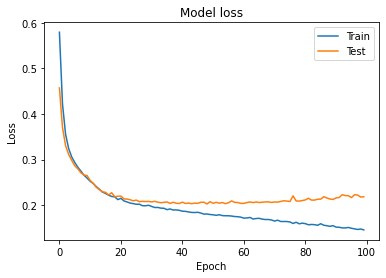

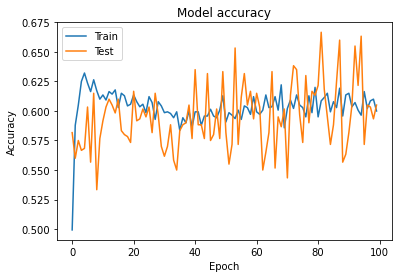

In [8]:
# Question 2
import matplotlib.pyplot as plt

# loss plot function
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')  
  plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

# plot loss and accuracy curves
plot_loss(h5.history['loss'], h5.history['val_loss'])
plot_accuracy(h5.history['accuracy'], h5.history['val_accuracy'])

## Regularization

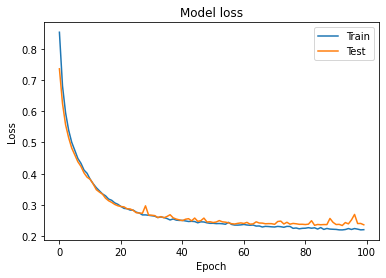

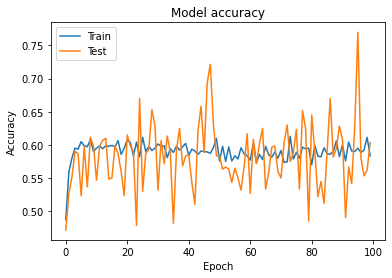

In [9]:
# Question 3
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import regularizers
import numpy as np

# load train and test data
X_train_sensors=np.load('data/irrigation/sensors_train.npy')
y_train_parcels=np.load('data/irrigation/parcels_train.npy')
X_test_sensors=np.load('data/irrigation/sensors_test.npy')
y_test_parcels=np.load('data/irrigation/parcels_test.npy')

# instantiate the model
model5R=Sequential()

# add dense layer with regularization
model5R.add(Dense(64, input_shape=(20,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# add the output layer and compile the model
model5R.add(Dense(3, activation='sigmoid'))
model5R.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
h5R=model5R.fit(X_train_sensors, y_train_parcels, epochs=100, verbose=0,
                validation_data=(X_test_sensors, y_test_parcels))

# plot loss and accuracy curves
plot_loss(h5R.history['loss'], h5R.history['val_loss'])
plot_accuracy(h5R.history['accuracy'], h5R.history['val_accuracy'])

## Dropout

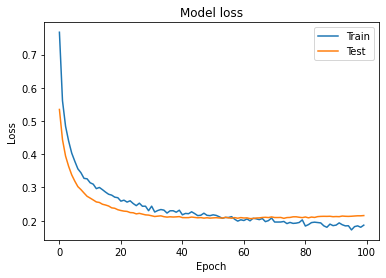

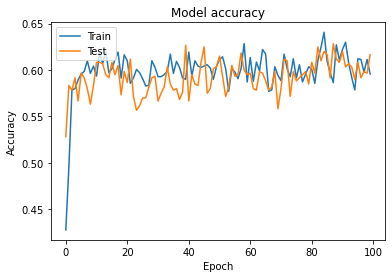

In [10]:
#Question 4
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import regularizers
import numpy as np

# load train and test data
X_train_sensors=np.load('data/irrigation/sensors_train.npy')
y_train_parcels=np.load('data/irrigation/parcels_train.npy')
X_test_sensors=np.load('data/irrigation/sensors_test.npy')
y_test_parcels=np.load('data/irrigation/parcels_test.npy')

# instantiate the model and add input and hiddel layer
model5D = Sequential()
model5D.add(Dense(64, input_shape=(20,), activation='relu'))

# add a dropout layer
model5D.add(Dropout(0.4)) 

# add output layer
model5D.add(Dense(3, activation='sigmoid'))
model5D.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
h5D=model5D.fit(X_train_sensors, y_train_parcels, epochs=100, verbose=0, 
                validation_data=(X_test_sensors, y_test_parcels))

# plot loss and accuracy curves
plot_loss(h5D.history['loss'], h5D.history['val_loss'])
plot_accuracy(h5D.history['accuracy'], h5D.history['val_accuracy'])

## Early stopping

In [11]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
from keras import regularizers
import numpy as np

# load train and test data
X_train_sensors=np.load('data/irrigation/sensors_train.npy')
y_train_parcels=np.load('data/irrigation/parcels_train.npy')
X_test_sensors=np.load('data/irrigation/sensors_test.npy')
y_test_parcels=np.load('data/irrigation/parcels_test.npy')

# build and compile the model
model5ES=Sequential()
model5ES.add(Dense(64, input_shape=(20,), activation='relu'))
model5ES.add(Dense(3, activation='sigmoid'))
model5ES.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Question 5
# instantiate an early stopping
early_stopping=EarlyStopping(monitor='val_accuracy', patience=4)

# Question 6
# train the model with early stopping
model5ES.fit(X_train_sensors, y_train_parcels, epochs=1000,
           validation_data=(X_test_sensors, y_test_parcels), 
           callbacks=[early_stopping])

Epoch 1/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.6270 - accuracy: 0.4929 - val_loss: 0.4651 - val_accuracy: 0.6933
Epoch 2/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.6543 - val_loss: 0.3854 - val_accuracy: 0.6767
Epoch 3/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.6471 - val_loss: 0.3435 - val_accuracy: 0.6383
Epoch 4/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.6343 - val_loss: 0.3187 - val_accuracy: 0.6450
Epoch 5/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.6550 - val_loss: 0.3132 - val_accuracy: 0.6667


## ModelCheckpoint

In [3]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.models import Sequential
from keras import regularizers
import numpy as np

# load train and test data
X_train_sensors=np.load('data/irrigation/sensors_train.npy')
y_train_parcels=np.load('data/irrigation/parcels_train.npy')
X_test_sensors=np.load('data/irrigation/sensors_test.npy')
y_test_parcels=np.load('data/irrigation/parcels_test.npy')

# build the model
model5MC=Sequential()
# add dense layer with regularization
model5MC.add(Dense(64, input_shape=(20,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model5MC.add(Dense(3, activation='sigmoid'))
model5MC.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Question 7
# instantiate early stopping with val_acc monitor
es_monitor_val_acc=EarlyStopping(monitor='val_accuracy', patience=10)

# Question 8
# instantiate ModelCheckpoint
modelcheckpoint=ModelCheckpoint('out/best_irrigation_model.hdf5', monitor='val_accuracy', save_best_only=True)

# Question 9
# train the model with early stopping and model checkpoint
h5MC=model5MC.fit(X_train_sensors, y_train_parcels, epochs=10000000, 
                  validation_data=(X_test_sensors, y_test_parcels), 
                  callbacks=[es_monitor_val_acc, modelcheckpoint])

Epoch 1/10000000
44/44 [==============================] - 0s 8ms/step - loss: 0.8153 - accuracy: 0.5421 - val_loss: 0.6804 - val_accuracy: 0.6133
Epoch 2/10000000
44/44 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6086 - val_loss: 0.5845 - val_accuracy: 0.5917
Epoch 3/10000000
44/44 [==============================] - 0s 3ms/step - loss: 0.5659 - accuracy: 0.6157 - val_loss: 0.5284 - val_accuracy: 0.5817
Epoch 4/10000000
44/44 [==============================] - 0s 5ms/step - loss: 0.5162 - accuracy: 0.6221 - val_loss: 0.4898 - val_accuracy: 0.6167
Epoch 5/10000000
44/44 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.6257 - val_loss: 0.4612 - val_accuracy: 0.5833
Epoch 6/10000000
44/44 [==============================] - 0s 6ms/step - loss: 0.4541 - accuracy: 0.6143 - val_loss: 0.4397 - val_accuracy: 0.6183
Epoch 7/10000000
44/44 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.6236 - val_loss: 0.4178 -

In [4]:
# Question 10
# load saved model
from keras.models import load_model

best_model=load_model('out/best_irrigation_model.hdf5')

# print model architecure
best_model.summary()

# print model parametes
print('\nModel parameters:\n', best_model.get_weights())

# evaluate model loss and accuracy on test data
print('model validation loss : ', np.round(best_model.evaluate(X_test_sensors, y_test_parcels, verbose=0)[0],4),
      ' -  model validation accuracy : ', np.round(best_model.evaluate(X_test_sensors, y_test_parcels, verbose=0)[1],4))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________

Model parameters:
 [array([[ 0.19099125, -0.02716987, -0.10435341, ..., -0.02304786,
        -0.13202293,  0.06287713],
       [ 0.10058462, -0.01830264, -0.02942032, ...,  0.076713  ,
        -0.01529586,  0.00414917],
       [ 0.02107203,  0.10114032, -0.07118853, ...,  0.00465241,
        -0.00691819, -0.0067373 ],
       ...,
       [ 0.15374297, -0.06997908, -0.19452058, ...,  0.15799639,
        -0.2306398 ,  0.03289003],
       [-0.02068066,  0.00788838,  0.0177673 , ...,  0.00577309,
         0.09986